<h3 style="text-align: center;" markdown="1">Handwritten Digit Recognition using Supervised Deep Learning Models


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
from sklearn import metrics

import numpy as np
import pandas as pd
import tensorflow as tf
import time
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> Reading data (training data of digit recongnizer competition from kaggle)</h2>


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
data.shape

(42000, 785)

Splitting Dataset


*   80% for training
*   20% for testing



In [ ]:
# Assuming you have a dataset named 'data'

# Define the split ratio (e.g., 80% for the first part, 20% for the second part)
split_ratio = 0.8

# Calculate the split index
split_index = int(split_ratio * len(data))

# Split the dataset into two parts
train = data[:split_index]
test = data[split_index:]


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(33600, 785)

In [ ]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33601,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33602,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33603,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33604,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(8400, 785)

<h3> Preprocossing of the data given </h3>

In [ ]:
y_train = train['label'].astype('float32')
x_train = train.drop(['label'],axis = 1).astype('int32')
y_test = test['label'].astype('float32')
x_test = test.drop(['label'],axis = 1).astype('float32')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
x_train = x_train.values.reshape(-1,28,28,1)
x_train = x_train / 255.0
x_test = x_test.values.reshape(-1,28,28,1)
x_test = x_test / 255.0
x_train.shape, x_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

<h3>Handwrittern data stored in dataset-></h3>

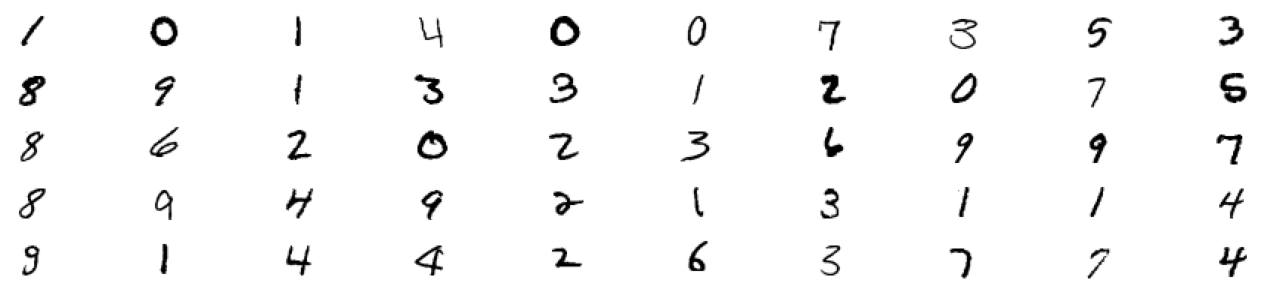

In [ ]:
plt.figure(figsize=(14, 3), tight_layout=True, facecolor="white")

for idx, digit in enumerate(x_train[:50]):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(digit, cmap="binary")
    plt.axis("off")

plt.show()

<h3>Categorising the numbers of labels possible</h3>

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train.shape, y_test.shape

((33600, 10), (8400, 10))

<h3> Callback if accuracy reaches or exceeds 99.9%

In [ ]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

#<h1>Models Used</h1>

1.   Simple Self Made CNN
2.   ResNet
3.   VGG-Net
4.   InceptionNet
5.   ResNet
6.   LeNet-5




1. **CNN**

In [ ]:
CNNmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

CNNmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
CNNmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
CNNmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])
end_time = time.time()
CNNtraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, CNN_accuracy = CNNmodel.evaluate(x_test,y_test)
end_time = time.time()
CNNevaluation_time = end_time - start_time



Epoch 1/20
672/672 [==============================] - 23s 9ms/step - loss: 0.2704 - accuracy: 0.9201
Epoch 2/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0925 - accuracy: 0.9716
Epoch 3/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0652 - accuracy: 0.9800
Epoch 4/20
672/672 [==============================] - 6s 8ms/step - loss: 0.0525 - accuracy: 0.9843
Epoch 5/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0481 - accuracy: 0.9854
Epoch 6/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0404 - accuracy: 0.9873
Epoch 7/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 8/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 9/20
672/672 [==============================] - 6s 8ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 10/20
672/672 [==============================] - 5s 8ms/step - loss: 0.0277 - accuracy: 0.991

Accuracy and time taken for the given Model

In [ ]:
print(f'Training Time: {CNNtraining_time} seconds')
print(f'Evaluation Time: {CNNevaluation_time} seconds')
# Print the training accuracy
print(f'Testing Accuracy: {CNN_accuracy}')

Training Time: 144.26873779296875 seconds
Evaluation Time: 1.5175960063934326 seconds
Training Accuracy: 0.9938095211982727


In [ ]:
CNNresults = CNNmodel.predict(x_test)

# select the index with the maximum probability
CNNresults = np.argmax(CNNresults,axis = 1)

CNNresults = pd.Series(CNNresults,name="Label")

263/263 [==============================] - 1s 2ms/step


True Positives (TP): 800
True Negatives (TN): 7585
False Positives (FP): 7
False Negatives (FN): 0


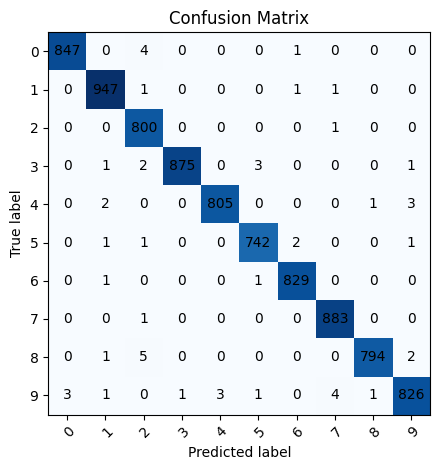

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(CNNresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


2. **RNN**

In [ ]:

# Define the model architecture
RNNmodel = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(28, 28), return_sequences=True),  # Add return_sequences=True for sequence output
    tf.keras.layers.LSTM(128),  # You can add additional LSTM layers if needed
    tf.keras.layers.Dense(10, activation='softmax')
])

RNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

RNNmodel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 213258 (833.04 KB)
Trainable params: 213258 (833.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
RNNmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
RNNmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])
end_time = time.time()
RNNtraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, RNN_accuracy = RNNmodel.evaluate(x_test,y_test)
end_time = time.time()
RNNevaluation_time = end_time - start_time



Epoch 1/20
672/672 [==============================] - 9s 7ms/step - loss: 0.5405 - accuracy: 0.8221
Epoch 2/20
672/672 [==============================] - 4s 6ms/step - loss: 0.1673 - accuracy: 0.9479
Epoch 3/20
672/672 [==============================] - 4s 6ms/step - loss: 0.1114 - accuracy: 0.9655
Epoch 4/20
672/672 [==============================] - 5s 7ms/step - loss: 0.0865 - accuracy: 0.9731
Epoch 5/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0692 - accuracy: 0.9783
Epoch 6/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0561 - accuracy: 0.9821
Epoch 7/20
672/672 [==============================] - 5s 7ms/step - loss: 0.0466 - accuracy: 0.9853
Epoch 8/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0406 - accuracy: 0.9874
Epoch 9/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0358 - accuracy: 0.9883
Epoch 10/20
672/672 [==============================] - 5s 7ms/step - loss: 0.0327 - accuracy: 0.9901

Accuracy and time taken for the given Model


In [ ]:
print(f'Training Time: {RNNtraining_time} seconds')
print(f'Evaluation Time: {RNNevaluation_time} seconds')
# Print the training accuracy
print(f'Training Accuracy: {RNN_accuracy}')

Training Time: 144.74764728546143 seconds
Evaluation Time: 1.9536161422729492 seconds
Training Accuracy: 0.9863095283508301


In [ ]:
RNNresults = RNNmodel.predict(x_test)

# select the index with the maximum probability
RNNresults = np.argmax(RNNresults,axis = 1)

RNNresults = pd.Series(RNNresults,name="Label")

263/263 [==============================] - 1s 3ms/step


True Positives (TP): 793
True Negatives (TN): 7586
False Positives (FP): 5
False Negatives (FN): 4


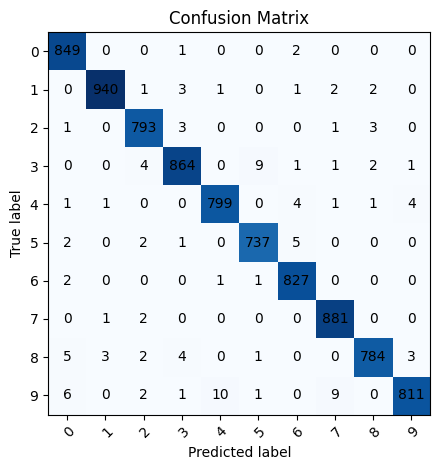

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(RNNresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


3. **VGG-Net**

In [ ]:
# Define your VGG-Net-like model
VGGmodel = tf.keras.models.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Fully Connected Layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax'),
])



In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
VGGmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
VGGmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])

end_time = time.time()
VGGtraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, VGG_accuracy = VGGmodel.evaluate(x_test,y_test)
end_time = time.time()
VGGevaluation_time = end_time - start_time

Epoch 1/20
672/672 [==============================] - 10s 9ms/step - loss: 0.2851 - accuracy: 0.9112
Epoch 2/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0902 - accuracy: 0.9723
Epoch 3/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 4/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0535 - accuracy: 0.9839
Epoch 5/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0440 - accuracy: 0.9867
Epoch 6/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 7/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0341 - accuracy: 0.9896
Epoch 8/20
672/672 [==============================] - 6s 8ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 9/20
672/672 [==============================] - 6s 9ms/step - loss: 0.0245 - accuracy: 0.9918
Epoch 10/20
672/672 [==============================] - 6s 8ms/step - loss: 0.0224 - accuracy: 0.992

Accuracy and time taken for the given Model

In [ ]:
print(f'Training Time: {VGGtraining_time} seconds')
print(f'Evaluation Time: {VGGevaluation_time} seconds')
# Print the training accuracy
print(f'Training Accuracy: {VGG_accuracy}')

Training Time: 144.24035143852234 seconds
Evaluation Time: 2.789938449859619 seconds
Training Accuracy: 0.9919047355651855


In [ ]:
VGGresults = VGGmodel.predict(x_test)

# select the index with the maximum probability
VGGresults = np.argmax(VGGresults,axis = 1)

VGGresults = pd.Series(VGGresults,name="Label")

263/263 [==============================] - 1s 3ms/step


True Positives (TP): 797
True Negatives (TN): 7589
False Positives (FP): 2
False Negatives (FN): 1


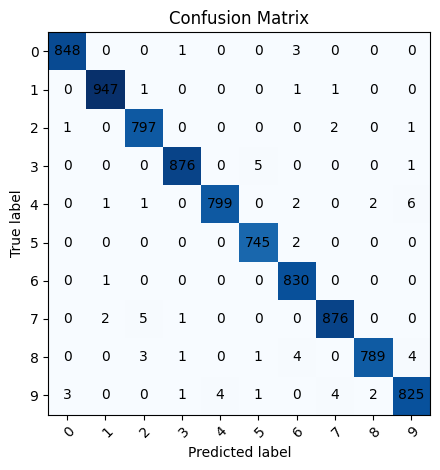

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(VGGresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


4. **Inception-Net**

In [ ]:

# Define your InceptionNet-like model
Inceptionmodel = tf.keras.models.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Block 2
    tf.keras.layers.Conv2D(128, (1, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Block 3
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
Inceptionmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
Inceptionmodel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        128       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)      

In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
Inceptionmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
Inceptionmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])
end_time = time.time()
Inceptiontraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, Inception_accuracy = Inceptionmodel.evaluate(x_test,y_test)
end_time = time.time()
Inceptionevaluation_time = end_time - start_time


Epoch 1/20
  5/672 [..............................] - ETA: 19s - loss: 1.5778 - accuracy: 0.5560

672/672 [==============================] - 25s 31ms/step - loss: 0.1249 - accuracy: 0.9628
Epoch 2/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0583 - accuracy: 0.9831
Epoch 3/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 4/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 5/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 6/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 7/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 8/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 9/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0230 - accuracy: 0.9922
Epoch 10/20
672/672 [==============================] - 21s 31ms/step - loss: 0.0169 - accurac

Accuracy and time taken for the given Model

In [ ]:
print(f'Training Time: {Inceptiontraining_time} seconds')
print(f'Evaluation Time: {Inceptionevaluation_time} seconds')
# Print the training accuracy
print(f'Training Accuracy: {Inception_accuracy}')

Training Time: 419.8472948074341 seconds
Evaluation Time: 2.6762843132019043 seconds
Training Accuracy: 0.9939285516738892


In [ ]:
Inceptionresults = Inceptionmodel.predict(x_test)

# select the index with the maximum probability
Inceptionresults = np.argmax(Inceptionresults,axis = 1)

Inceptionresults = pd.Series(Inceptionresults,name="Label")

263/263 [==============================] - 2s 6ms/step


True Positives (TP): 795
True Negatives (TN): 7594
False Positives (FP): 2
False Negatives (FN): 3


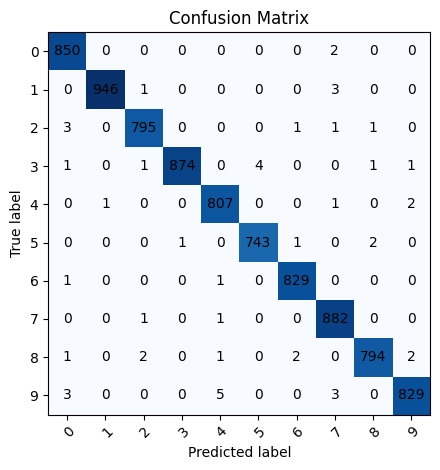

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(Inceptionresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


5. **ResNet**

In [ ]:
# Define a function for the residual block
def residual_block(x, filters):
    shortcut = x

    # Main Path
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)

    # Add shortcut to the main path
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

# Define your ResNet-like model
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Residual Blocks (Stack of 3 blocks)
for _ in range(3):
    x = residual_block(x, 64)

# Global Average Pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Output Layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)  # 10 is the number of output classes (digits)

# Create the model
ResNetmodel = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
ResNetmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
ResNetmodel.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 14, 14, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 64)             0         ['conv2d_14[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_15 (Conv2D)          (None, 7, 7, 64)             36928     ['max_pooling2d_6[0][0]'] 

In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
ResNetmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
ResNetmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])
end_time = time.time()
ResNettraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, Resnet_accuracy = ResNetmodel.evaluate(x_test,y_test)
end_time = time.time()
ResNetevaluation_time = end_time - start_time



Epoch 1/20
672/672 [==============================] - 7s 7ms/step - loss: 0.5496 - accuracy: 0.8122
Epoch 2/20
672/672 [==============================] - 4s 5ms/step - loss: 0.1364 - accuracy: 0.9587
Epoch 3/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0897 - accuracy: 0.9728
Epoch 4/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0721 - accuracy: 0.9785
Epoch 5/20
672/672 [==============================] - 4s 6ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 6/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0596 - accuracy: 0.9816
Epoch 7/20
672/672 [==============================] - 4s 5ms/step - loss: 0.0460 - accuracy: 0.9856
Epoch 8/20
672/672 [==============================] - 5s 7ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 9/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0365 - accuracy: 0.9892
Epoch 10/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0318 - accuracy: 0.9899

Accuracy and time taken for the given Model

In [ ]:
print(f'Training Time: {ResNettraining_time} seconds')
print(f'Evaluation Time: {ResNetevaluation_time} seconds')
# Print the training accuracy
print(f'Training Accuracy: {Resnet_accuracy}')

Training Time: 79.10803699493408 seconds
Evaluation Time: 1.4838588237762451 seconds
Training Accuracy: 0.9866666793823242


In [ ]:
Resnetresults = ResNetmodel.predict(x_test)

# select the index with the maximum probability
Resnetresults = np.argmax(Resnetresults,axis = 1)

Resnetresults = pd.Series(Resnetresults,name="Label")

263/263 [==============================] - 2s 5ms/step


True Positives (TP): 789
True Negatives (TN): 7585
False Positives (FP): 3
False Negatives (FN): 6


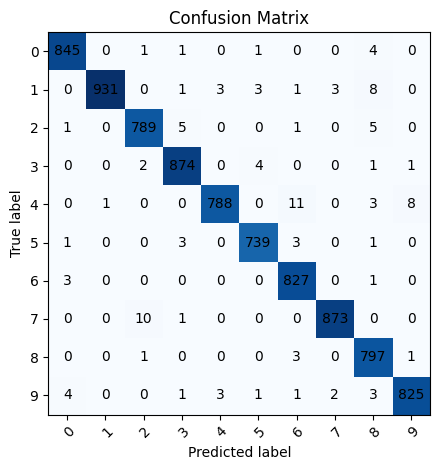

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(Resnetresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


6. LeNet-5

In [ ]:

Lenetmodel = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    tf.keras.layers.Flatten(),

    # Fully Connected Layer 1
    tf.keras.layers.Dense(120, activation='relu'),

    # Fully Connected Layer 2
    tf.keras.layers.Dense(84, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax'),

])

Lenetmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Lenetmodel.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 120)              

In [ ]:

#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
Lenetmodel.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
Lenetmodel.fit(x_train, y_train, batch_size = 50, epochs = 20, callbacks=[callbacks])
end_time = time.time()
Lenettraining_time = end_time - start_time

# Evaluation
start_time = time.time()
# Evaluate the model on the training data
train_loss, Lenet_accuracy = Lenetmodel.evaluate(x_test,y_test)
end_time = time.time()
Lenetevaluation_time = end_time - start_time

Epoch 1/20
672/672 [==============================] - 8s 7ms/step - loss: 0.4109 - accuracy: 0.8788
Epoch 2/20
672/672 [==============================] - 2s 4ms/step - loss: 0.1186 - accuracy: 0.9642
Epoch 3/20
672/672 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9749
Epoch 4/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0585 - accuracy: 0.9823
Epoch 6/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 7/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0408 - accuracy: 0.9870
Epoch 8/20
672/672 [==============================] - 4s 7ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 9/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 10/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0264 - accuracy: 0.9916

Accuracy and time taken for the given Model

In [ ]:
print(f'Training Time: {Lenettraining_time} seconds')
print(f'Evaluation Time: {Lenetevaluation_time} seconds')
# Print the training accuracy
print(f'Training Accuracy: {Lenet_accuracy}')

Training Time: 83.88506364822388 seconds
Evaluation Time: 0.99269700050354 seconds
Training Accuracy: 0.9848809242248535


In [ ]:
Lenetresults = Lenetmodel.predict(x_test)

# select the index with the maximum probability
Lenetresults = np.argmax(Lenetresults,axis = 1)

Lenetresults = pd.Series(Lenetresults,name="Label")

263/263 [==============================] - 1s 3ms/step


True Positives (TP): 792
True Negatives (TN): 7588
False Positives (FP): 4
False Negatives (FN): 6


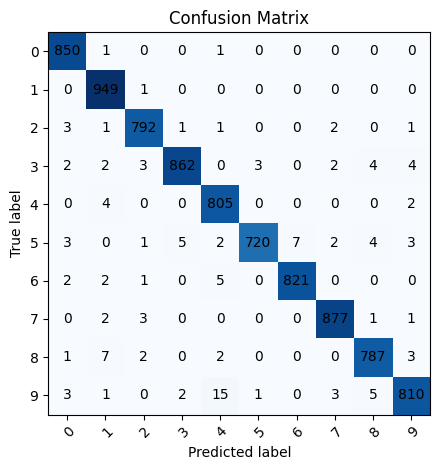

In [ ]:
# Assuming 'Lenetresults' contains raw class predictions (not one-hot encoded)
y_pred = pd.Series(Lenetresults, name="Label")
y_pred = tf.keras.utils.to_categorical(y_pred,10)
# Convert 'y_true' and 'y_pred' to their original class label format
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_class, y_pred_class)

# Calculate TP, TN, FP, FN as before
TP = confusion_matrix[2, 2]
TN = confusion_matrix[:2, :2].sum() + confusion_matrix[:2, 3:].sum() + confusion_matrix[3:, :2].sum() + confusion_matrix[3:, 3:].sum()
FP = confusion_matrix[0, 2] + confusion_matrix[1, 2] + confusion_matrix[3, 2] + confusion_matrix[4, 2]
FN = confusion_matrix[2, 0] + confusion_matrix[2, 1] + confusion_matrix[2, 3] + confusion_matrix[2, 4]

# Rest of your code for creating the confusion matrix plot



print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# create confusion matrix plot
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # all possible labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# set tick labels and locations
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.tight_layout()
plt.show()


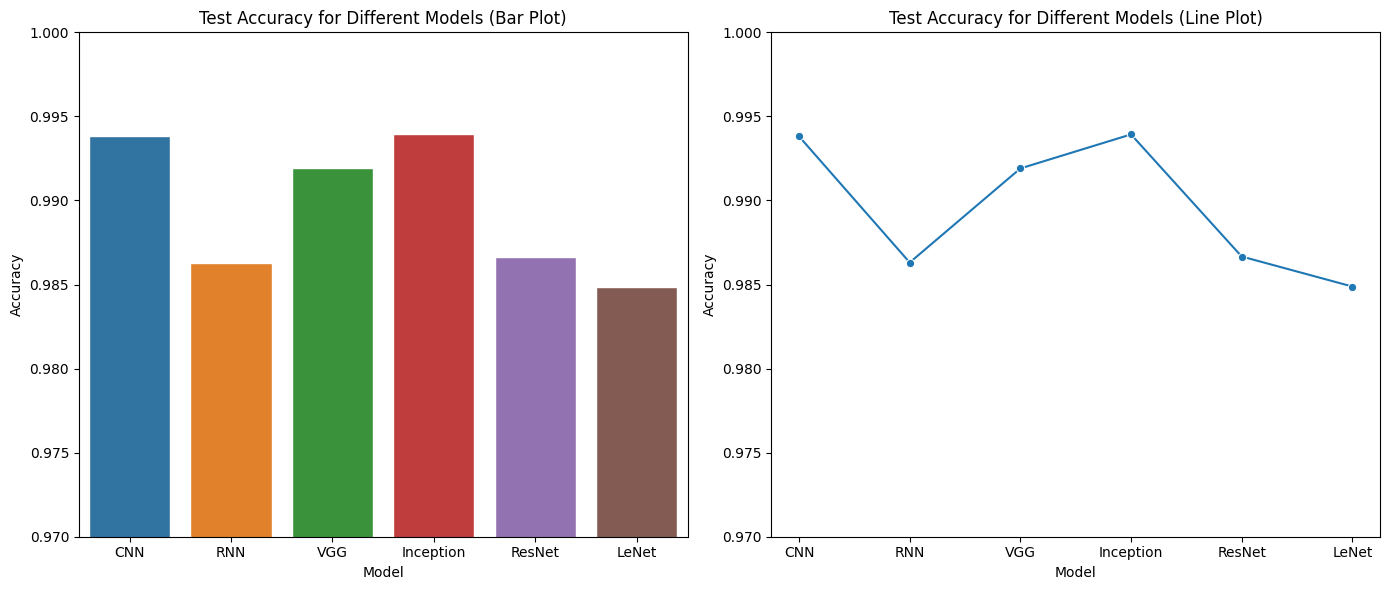

In [ ]:

# List of model names
models = ["CNN","RNN", "VGG","Inception","ResNet", "LeNet"]

# List of test accuracy values for each model
test_accuracy = [CNN_accuracy, RNN_accuracy, VGG_accuracy, Inception_accuracy, Resnet_accuracy, Lenet_accuracy]

# Create a figure with two subplots (bar plot and line plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bar Plot
sns.set_style("whitegrid", {'axes.grid': False})
sns.barplot(x=models, y=test_accuracy, ax=ax1)
ax1.set_title('Test Accuracy for Different Models (Bar Plot)')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.97, 1)  # Set the y-axis limits between 0.95 and 1

# Subplot 2: Line Plot
sns.set_style("whitegrid")
sns.lineplot(x=models, y=test_accuracy, marker='o', ax=ax2)
ax2.set_title('Test Accuracy for Different Models (Line Plot)')
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.97, 1)  # Set the y-axis limits between 0.95 and 1

plt.tight_layout()
plt.show()


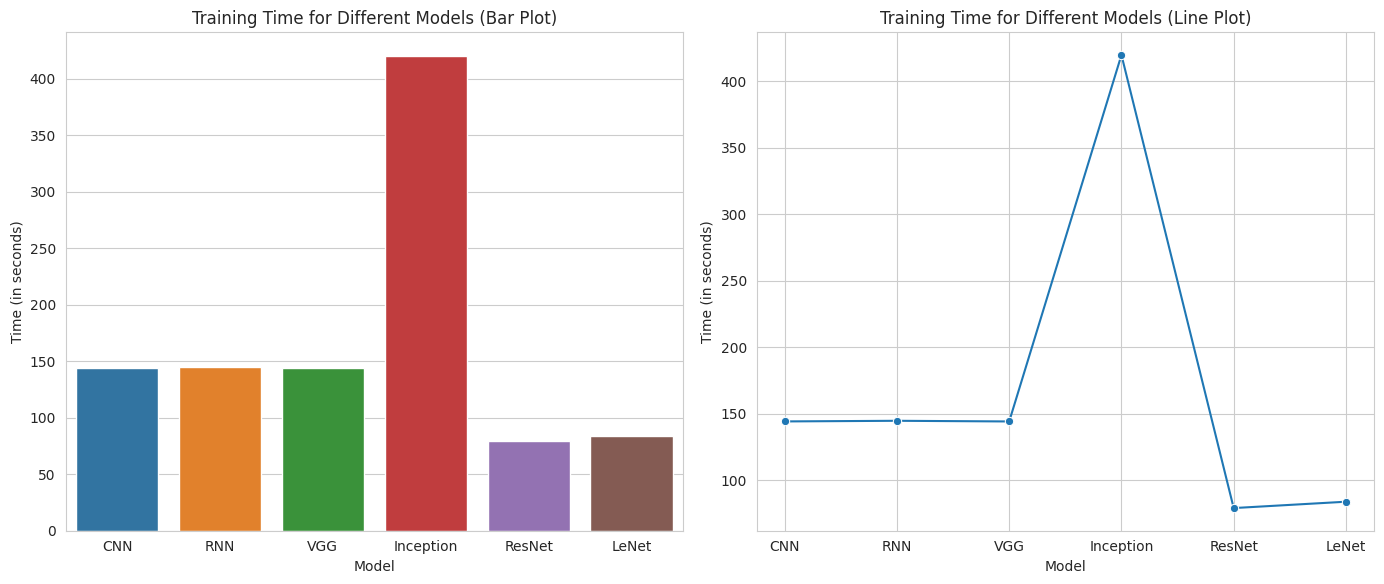

In [ ]:

# List of model names
models = ["CNN", "RNN", "VGG", "Inception", "ResNet", "LeNet"]

# List of traing time values for each model
training_time = [CNNtraining_time, RNNtraining_time, VGGtraining_time, Inceptiontraining_time, ResNettraining_time, Lenettraining_time]

# Create a figure with two subplots (bar plot and line plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bar Plot
sns.set_style("whitegrid", {'axes.grid': False})
sns.barplot(x=models, y=training_time, ax=ax1)
ax1.set_title('Training Time for Different Models (Bar Plot)')
ax1.set_xlabel('Model')
ax1.set_ylabel('Time (in seconds)')

# Subplot 2: Line Plot
# Clear the previous style settings
sns.set(style=None)
sns.lineplot(x=models, y=training_time, marker='o', ax=ax2)
ax2.set_title('Training Time for Different Models (Line Plot)')
ax2.set_xlabel('Model')
ax2.set_ylabel('Time (in seconds)')

plt.tight_layout()
plt.show()
